### Github URL - https://github.com/gsahai1x/AIML
#### Look for Customer Segmentation Project (html and Jupyter notebook)

In [1]:
import warnings
warnings.filterwarnings('ignore')

## AllLife Credit Card Customer Segmentation
>* **Background:** AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.
>* **Objective**: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.
>* **Key Questions**:
>> 1. How many different segments of customers are there?
>> 2. How are these segments different from each other?
>> 3. What are your recommendations to the bank on how to better market to and service these customers?
>* **Data Description:** 
>>* Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.
>* **Steps to follow:**
>> 1. Perform **univariate analysis** on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, **create visualizations** to explore data. (10 marks)
>> 2. Properly **comment** on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
>> 3. Execute **K-means** clustering use **elbow plot** and analyse clusters using **boxplot** (10 marks)
>> 4. Execute **hierarchical clustering (with different linkages)** with the help of **dendrogram and cophenetic coeff**. Analyse clusters formed using **boxplot** (15 marks)
>> 5. Calculate **average silhouette score** for both methods. (5 marks)
>> 6. **Compare K-means clusters with Hierarchical clusters.** (5 marks)
>> 7. Analysis the clusters formed, tell us **how is one cluster different from another and answer all the key questions.** (10 marks)

### Import Libraries

In [2]:
#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import set_config
set_config(print_changed_only=False)
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from matplotlib import cm
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

### Import Data

In [3]:
#Read Data
df = pd.read_excel('Credit Card Customer Data.xlsx')

In [4]:
#Get 1st 5 records
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Univariate Analysis

In [5]:
#There are 660 rows and 7 columns. 
df.shape

(660, 7)

In [6]:
# all values are non-null. Serial No. and Customer Key columns are not very valuable and will be removed for clustering. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.00,660.00,660.00,660.00,660.00,660.00,660.00
mean,330.50,"55,141.44","34,574.24",4.71,2.40,2.61,3.58
std,190.67,"25,627.77","37,625.49",2.17,1.63,2.94,2.87
min,1.00,"11,265.00","3,000.00",1.00,0.00,0.00,0.00
25%,165.75,"33,825.25","10,000.00",3.00,1.00,1.00,1.00
50%,330.50,"53,874.50","18,000.00",5.00,2.00,2.00,3.00
75%,495.25,"77,202.50","48,000.00",6.00,4.00,4.00,5.00
max,660.00,"99,843.00","200,000.00",10.00,5.00,15.00,10.00


>* There is a high variance average credit limit. However all other columns have a siginificant lower variance.Data needs to be scaled to make sure avergae credit limit does not dominate all clusters. 

In [8]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

>* No null values

In [9]:
for col in df.columns[2:]:
    b = np.sort(df[col].unique())
    print(col, b)

Avg_Credit_Limit [  3000   5000   6000   7000   8000   9000  10000  11000  12000  13000
  14000  15000  16000  17000  18000  19000  20000  25000  26000  27000
  28000  29000  30000  31000  32000  33000  34000  35000  36000  37000
  38000  39000  40000  41000  42000  43000  44000  45000  46000  47000
  48000  49000  50000  51000  52000  54000  55000  56000  57000  58000
  59000  60000  61000  62000  63000  64000  65000  66000  67000  68000
  69000  70000  71000  72000  73000  74000  75000  84000  91000  94000
  95000  96000  97000  98000  99000 100000 106000 108000 111000 112000
 114000 121000 123000 126000 127000 131000 132000 136000 144000 145000
 146000 153000 155000 156000 157000 158000 163000 166000 167000 171000
 172000 173000 176000 178000 183000 184000 186000 187000 195000 200000]
Total_Credit_Cards [ 1  2  3  4  5  6  7  8  9 10]
Total_visits_bank [0 1 2 3 4 5]
Total_visits_online [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Total_calls_made [ 0  1  2  3  4  5  6  7  8  9 

>* Checking if there are null values. There are none. 
>* Checking if the unique values have any other values which may be mistaken as integer. There are none
>* Serial no and Customer Key does not need to checked as that will be excluded from clustering. 

### Visualizations for Univariate Analysis

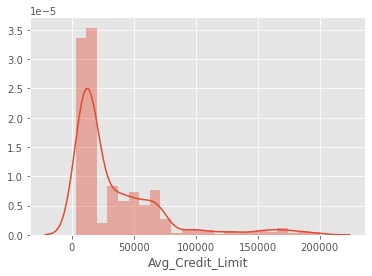

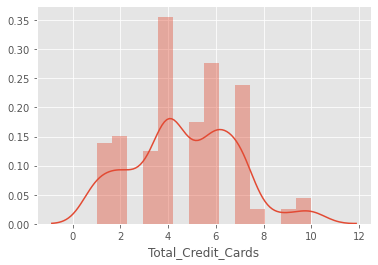

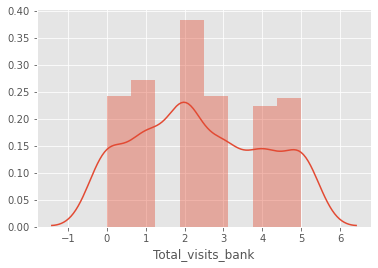

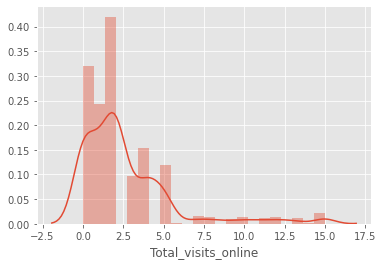

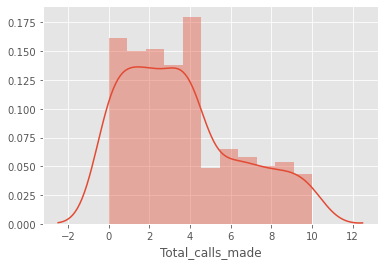

In [10]:
for col in df.columns[2:]:
    sns.distplot(df[col])
    plt.show()

>* Average Credit Limit is highly skewed to the right. 
>* Total Visits online highly skewed to right.
>* **Looking at total number of credit cards, there may be 4 clusters. One would be a very small cluster though**

AVG_CREDIT_LIMIT


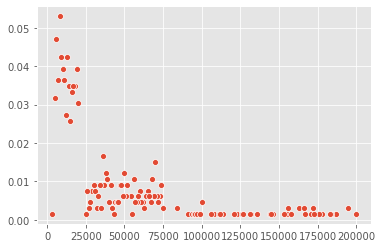

TOTAL_CREDIT_CARDS


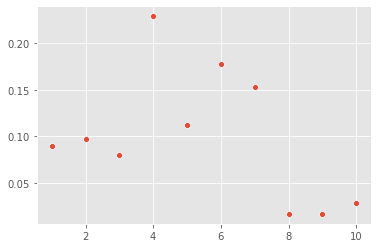

TOTAL_VISITS_BANK


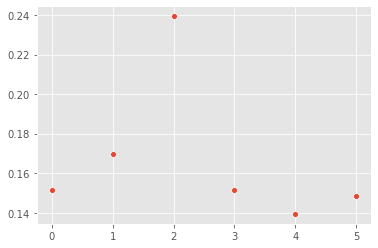

TOTAL_VISITS_ONLINE


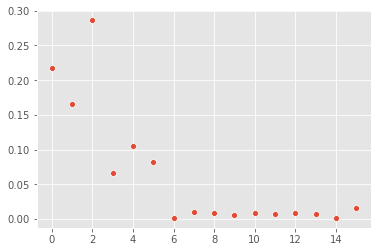

TOTAL_CALLS_MADE


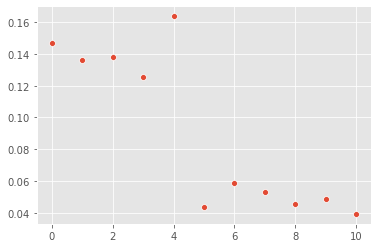

In [11]:
for col in df.columns[2:]:
    print(col.upper())
    sns.scatterplot(data=df[col].value_counts(normalize=True),hue=df[col], size=df[col].value_counts(normalize=True),palette='deep', sizes=(20, 200))
    plt.show()

>* Majority of people with a credit limit < 25K, A high number have credit limit between 25K and 75K, and only a handful have a credit limit between >75K and goes till 200K. So we may at least be looking at 3 clusters
>* Majority have between 1-4 credit cards, a high number have 5-7 credit cards, and only a few with more than or equal to 8 credit cards. 
>* Majority of people visited online between 0-5 times. 
>* Most of the people made 0-4 calls and rest around 20% made calls between 5-10 times. 

### Bivariate Analysis

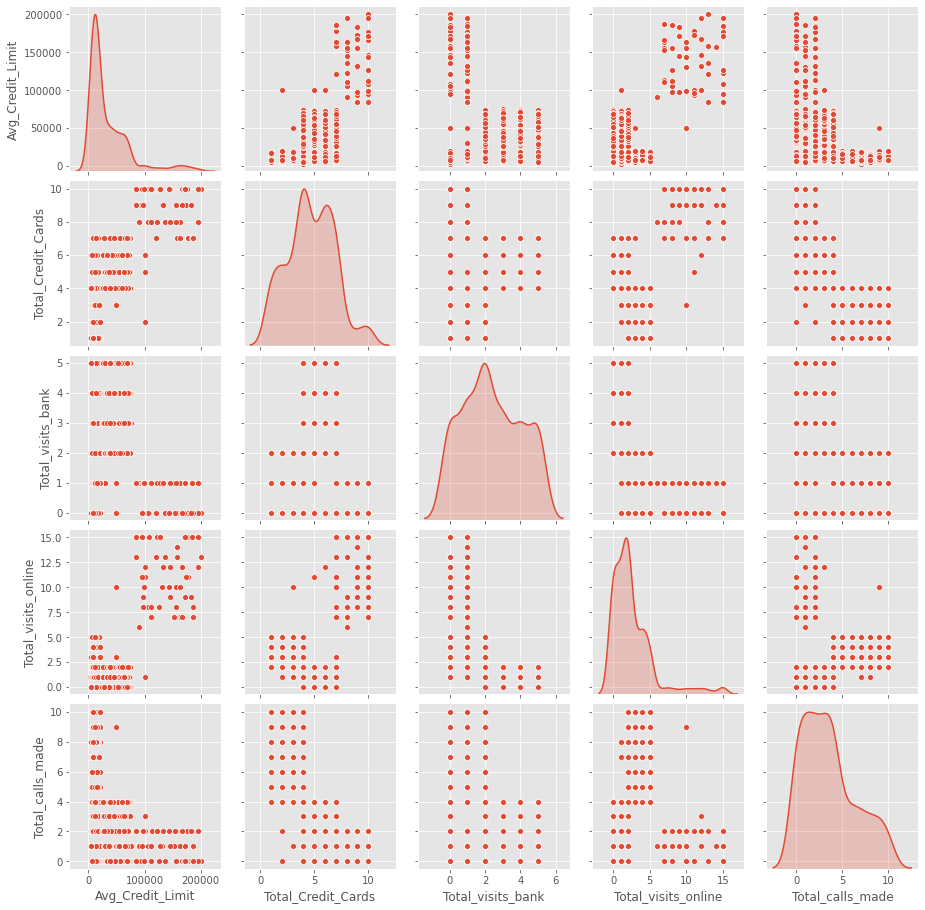

In [12]:
sns.pairplot(df.iloc[:,2:],diag_kind='kde')
plt.show()

>* Data points are somewhat related to each other:
>>* Average Credit Limit seems to be higher for customers with more credit cards
>>* Customers with higher credit limit seems to be visiting online more than people with lower credit limit. 

In [13]:
dfa = df.drop(['Sl_No','Customer Key'],axis=1)

In [14]:
dfa.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

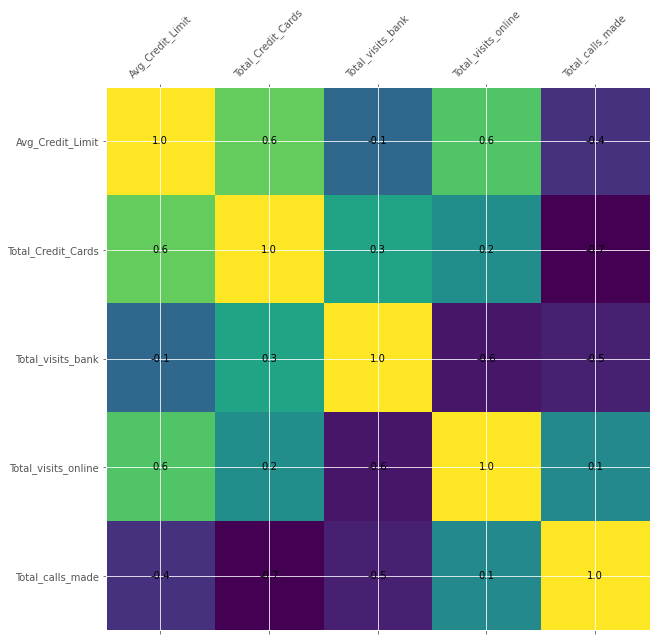

In [15]:
#get correlation
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plot_corr(dfa)

>* Credit Limit is positively correlated with total credit cards and total online visits, which confirms what we concluded for the previous pairplot

### Scaling data to adjust weights

In [16]:
#method 1 - Get ZScore (equivalent of scaling data)
from scipy.stats import zscore
dfz = dfa.apply(zscore)

In [17]:
dfz.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


In [18]:
#method 2 (scaling the data so that each data point has equal weight)
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(dfa),columns=dfa.columns)
Y_std = X_std.copy()
X_std.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


### Kmeans Clustering

In [19]:
cluster_range = range(1,15)
cluster_errors = []
ar = []
lb = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5, max_iter=1000)
    clusters.fit(X_std)
    labels = clusters.labels_
    lb.append(len(np.unique(labels)))
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    if len(np.unique(labels)) > 1:
        ss = round(silhouette_score(X_std,labels),2)
    else:
        ss = 0
    ar.append(ss)
# print("Silhoutte Coeff", a, "No of Clusters", len(np.unique(labels)))

kmeans_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors,
                            "Silhoutte" : ar})
kmeans_df[0:15]

,num_clusters,cluster_errors,Silhoutte
0,1,"3,300.00",0.00
1,2,"2,040.99",0.42
2,3,933.04,0.52
3,4,780.77,0.36
4,5,704.67,0.27
5,6,642.51,0.26
6,7,600.36,0.25
7,8,567.22,0.23
8,9,541.02,0.22
9,10,519.38,0.24


<Figure size 1440x1440 with 0 Axes>

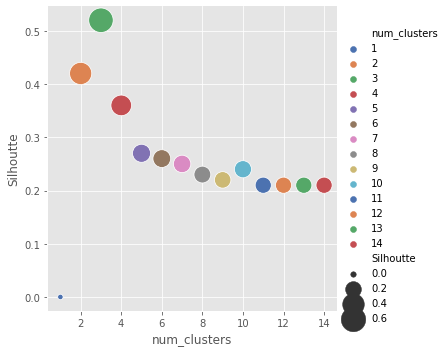

In [20]:
plt.figure(figsize=(20,20))
sns.relplot(data=kmeans_df, x='num_clusters',y='Silhoutte',hue='num_clusters', 
            size='Silhoutte', palette = 'deep', sizes=(30, 600))
plt.show()

>* Silhoutte coefficient seems to be highest for 3 clusters > 0.5%. We can choose 3 clusters

### Elbow Plot for Kmeans

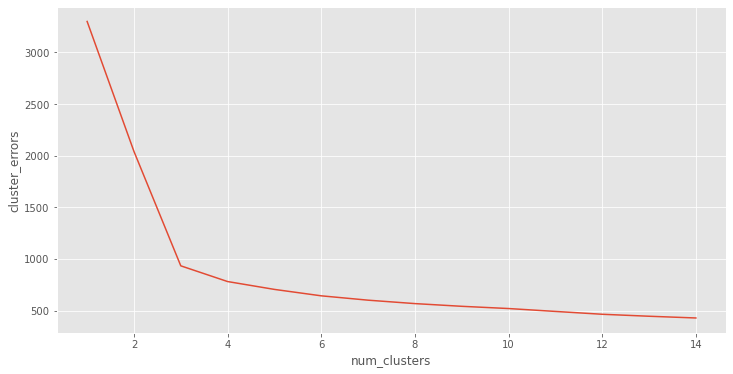

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x='num_clusters', y='cluster_errors', data=kmeans_df)
plt.show()

>* **Elbow plot also has an elbow at 3 clusters. Go with 3 clusters. It may change when notebook reruns.**

In [22]:
max_clusters_kmeans = kmeans_df[kmeans_df['Silhoutte'] == kmeans_df['Silhoutte'].max()]['num_clusters'].max()
print("\033[1mMax Clusters(Kmeans):\033[0m", max_clusters_kmeans)

Max Clusters(Kmeans): 3


In [23]:
#Execute kmeans for 3 clusters. For kmeans number of clusters need to be supplied while calling kmeans.
kmeans = KMeans(n_clusters=max_clusters_kmeans, n_init = 5, max_iter=1000, random_state=12345)
kmeans.fit(X_std)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=5, n_jobs='deprecated',
       precompute_distances='deprecated', random_state=12345, tol=0.0001,
       verbose=0)


In [24]:
#Get all label information. This tells us which rows are assigned to which cluster by the algorightm. 
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(np.unique(labels,return_counts=True))

(array([0, 1, 2]), array([ 50, 224, 386], dtype=int64))


>* There are 50, 224,386 elements in clusters 0,1,2 respectively. 

In [25]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X_std) )
centroid_df.transpose()

,0,1,2
Avg_Credit_Limit,2.83,-0.60,-0.02
Total_Credit_Cards,1.86,-1.06,0.37
Total_visits_bank,-1.11,-0.90,0.67
Total_visits_online,2.83,0.32,-0.55
Total_calls_made,-0.87,1.15,-0.55


In [26]:
centroids.min(), centroids.max()

(-1.1057626863991183, 2.8317640897412817)

In [27]:
# Check the number of data in each cluster
predictions = kmeans.predict(X_std)

>* predict cluster values for the data

In [28]:
X_std["kmeans_group"] = predictions
df["kmeans_group"] = predictions
df['kmeans_group'] = df['kmeans_group'].astype('category')

>* Assign clusters to the standardized dataframe and original dataframe. 

In [29]:
X_std.groupby(['kmeans_group'])['Avg_Credit_Limit'].count()

kmeans_group
0     50
1    224
2    386
Name: Avg_Credit_Limit, dtype: int64

>* Confirm if the values match with the assignment of cluster

In [30]:
a = round(silhouette_score(X_std,labels),2)
print("Silhoutte Coeff", a, "No of Clusters", len(np.unique(labels)))

Silhoutte Coeff 0.54 No of Clusters 3


>* Silhoutte Coeffcient > 0.5. As per rule the higher the silhoutte, better is the cluster

### Analysis of Kmeans cluster using boxplot

>* Analysis is being done on X_std because box plots cannot be compared with each other on unstandardized data. 

<Figure size 1224x432 with 0 Axes>

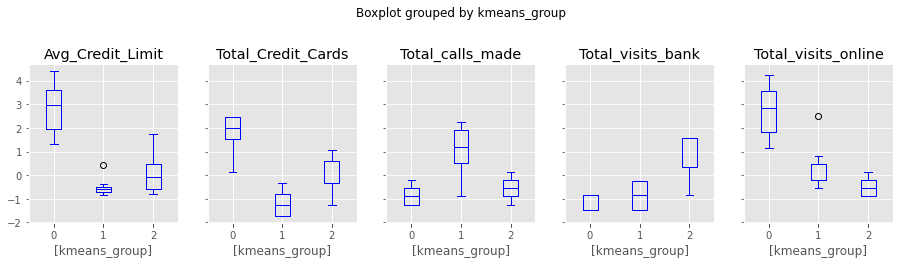

In [31]:
plt.figure(figsize=(17,6))
X_std.boxplot(by = 'kmeans_group',  layout=(3,5), figsize=(15, 10), color='blue')
plt.show()

The silhoutte coefficient was highest for 3 clusters so 3 clusters were creating with following observations:
1. <font color=blue>Group 0</font> - The number of customers in this group is the lowest(50). They have higher average credit limit and  credit cards, and does most of communication and servicing by going online. They rarely call or visit bank. There is a large variation in higher credit limits and number of visits online, but average numbers are high. 
2. <font color=blue>Group 1</font> - A high number of customers (224) belong to this group. These customers have the lowest average credit limit and credit cards. They do go online for communication and self-service, but they make the most number of total calls to the call center and are lower in bracket of visiting bank. There is a high variation in total calls made. 
3. <font color=blue>Group 2</font> - Highest number of customers(386) belong to this group. These customers have an average/average credit limit and credit cards. The do call and go online sometimes, but most of the time prefer to visit the bank and account for most number of visits to the bank. There is a high variation is total visits to the bank.

### Hierarchical Clustering

### Ward linkage method

In [32]:
#generate the linkage matrix
Z_ward = linkage(Y_std, method='ward', metric='euclidean')
c_ward, coph_dists_ward = cophenet(Z_ward , pdist(Y_std))
print("\033[1mLinkage Matrix(ward) - \033[0m", Z_ward.shape,
      "\n\033[1mCophenetic Coefficient -\033[0m", '{:,.2f}'.format(c_ward), 
      "\n\033[1mCophenetic Distances - \033[0m", '{:,.2f}'.format(coph_dists_ward.min()), 
      "-", '{:,.2f}'.format(coph_dists_ward.max()))

Linkage Matrix(ward) -  (659, 4) 
Cophenetic Coefficient - 0.74 
Cophenetic Distances -  0.00 - 50.16


>* For Ward Linkage, Cophenetic Coefficient is 0.74

In [33]:
Z_ward[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   16.84480374,  385.        ],
       [1311.        , 1316.        ,   47.06715339,  435.        ],
       [1315.        , 1317.        ,   50.16298666,  660.        ]])

#### Dendrogram using Ward linkage method

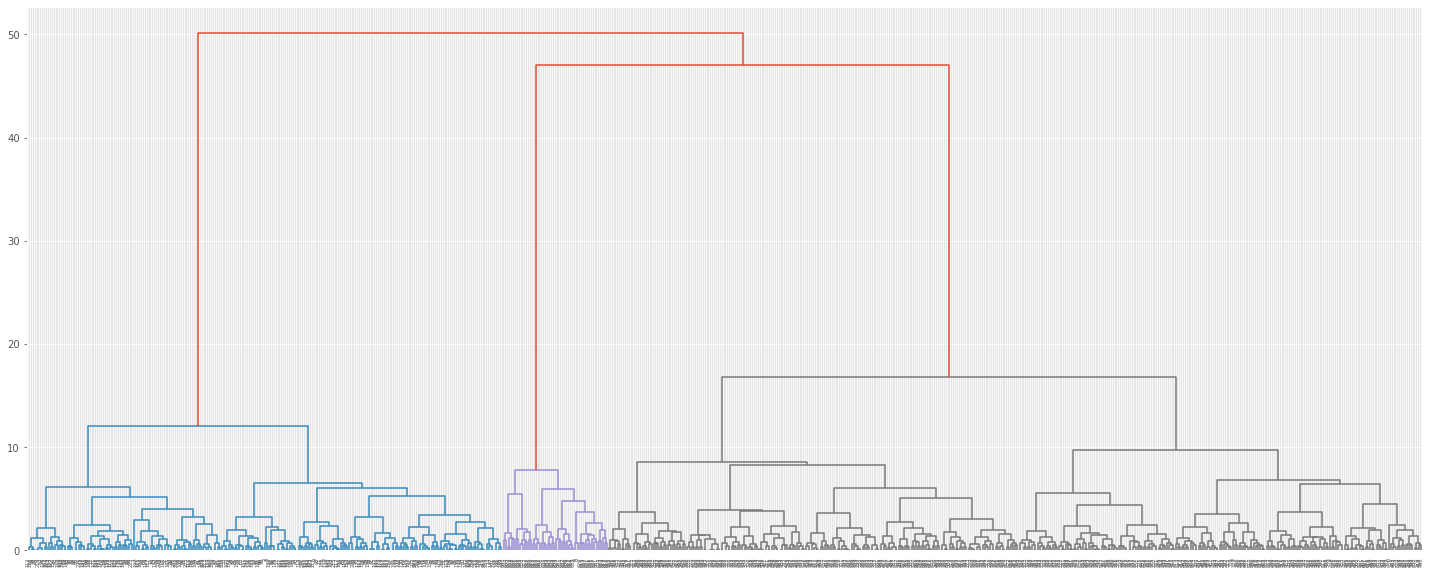

In [34]:
plt.figure(figsize=(25, 10))
dendrogram(Z_ward)
plt.show()

>* Distances range from 0-50

#### Dendrogram with Ward linkage to show last 15 clusters

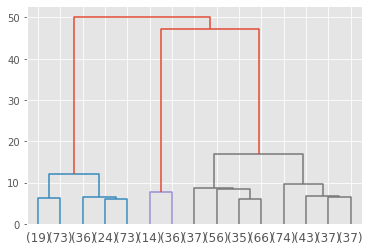

In [35]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z_ward,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=15,  # show only the last p merged clusters
)
plt.show()

>* Simplified to show last 15 merged clusters. Distances range from 0-50

#### Ward linkage - Choose no. of clusters based on based best Silhoutte Coefficient

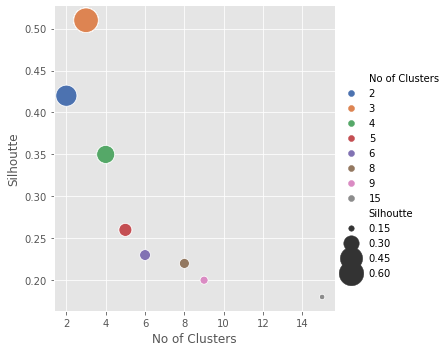

In [36]:
h_clus_ward = []
for i in range(0,int(coph_dists_ward.max())):
    clusters_ward = fcluster(Z_ward, i, criterion='distance')
    if len(np.unique(clusters_ward)) > 1:
        a = round(silhouette_score(Y_std,clusters_ward),2)
    else:
        a = 0
    h_clus_ward.append({"Max distance":i,"Silhoutte":a, "No of Clusters":len(np.unique(clusters_ward))})
dfh_ward = pd.DataFrame(h_clus_ward).sort_values(by=['Silhoutte','Max distance'], ascending=[False,True])
sns.relplot(x='No of Clusters', y='Silhoutte', hue='No of Clusters', size='Silhoutte', sizes=(30, 600), palette='deep', 
                data=dfh_ward[dfh_ward['No of Clusters'] <= 15] )
plt.show()

>* For 3 clusters, Silhoutte is the highest > 0.5

In [37]:
dfh_ward.head()

,Max distance,Silhoutte,No of Clusters
17,17,0.51,3
18,18,0.51,3
19,19,0.51,3
20,20,0.51,3
21,21,0.51,3


>* Get Max distance and Max Clusters

In [38]:
max_distance_ward = dfh_ward[dfh_ward['Silhoutte'] == dfh_ward['Silhoutte'].max()]['Max distance'].max()
max_h_clusters_ward = dfh_ward[dfh_ward['Silhoutte'] == dfh_ward['Silhoutte'].max()]['No of Clusters'].max()
print("\033[1mMax Distance(Ward) - \033[0m",max_distance_ward, "\n\033[1mMax Clusters(Ward) - \033[0m", max_h_clusters_ward)

Max Distance(Ward) -  47 
Max Clusters(Ward) -  3


In [39]:
clusters_ward = fcluster(Z_ward, max_distance_ward, criterion='distance')
Y_std['hgroup_ward'] = clusters_ward
Y_std.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,hgroup_ward
0,1.74,-1.25,-0.86,-0.55,-1.25,3
1,0.41,-0.79,-1.47,2.52,1.89,1
2,0.41,1.06,-0.86,0.13,0.15,3
3,-0.12,0.14,-0.86,-0.55,0.15,3
4,1.74,0.60,-1.47,3.20,-0.20,2
5,-0.39,-0.79,-1.47,-0.55,1.54,1
6,1.74,0.14,-1.47,2.86,-0.55,2
7,-0.52,-0.79,-1.47,-0.55,-0.90,1
8,-0.79,-1.25,-1.47,-0.21,-0.55,1
9,-0.84,-0.33,-1.47,-0.55,1.19,1


#### Ward linkage - Box plot to show cluster attributes

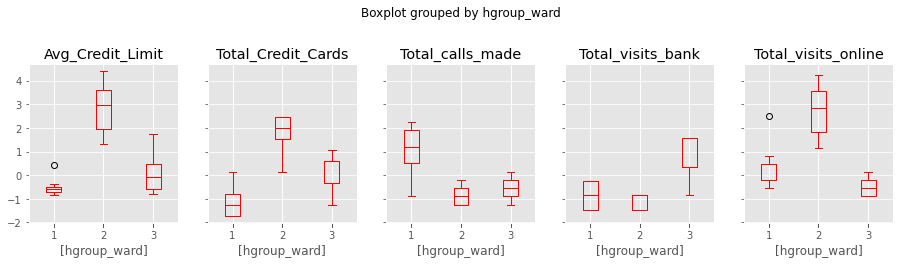

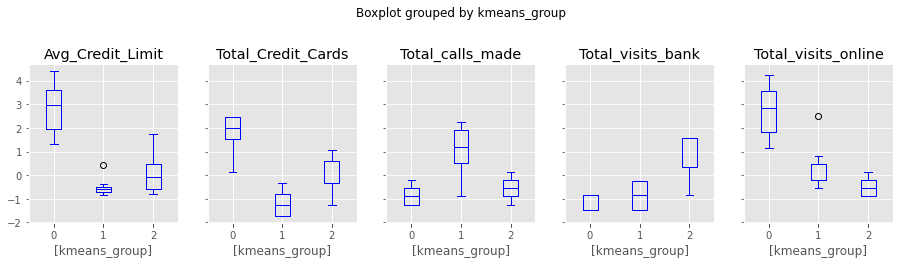

In [40]:
filtercol = Y_std.columns[Y_std.columns.str.startswith(('hgroup')) & ~Y_std.columns.str.endswith('ward')]
Y_std[Y_std.columns[~Y_std.columns.isin(filtercol)]].boxplot(by=['hgroup_ward'],  layout=(3,5), figsize=(15, 10), color='red')
X_std.boxplot(by = 'kmeans_group',  layout=(3,5), figsize=(15, 10), color='blue')
plt.show()

>* Based on boxplot visuals above, <font color=blue>Kmeans</font> groups can be mapped to <font color=red>Agglomerative clustering</font> groups.
>>* <font color=red>Group 1</font> maps to <font color=blue>Group 1</font>
>>* <font color=red>Group 3</font> maps to <font color=blue>Group 2</font>
>>* <font color=red>Group 2</font> maps to <font color=blue>Group 0</font>
>* **Visually <font color=blue>Kmeans</font> and <font color=red>Ward linkage</font> clustering groups are very similar and box plots are almost identical.**

### Average Linkage Method

In [41]:
#generate the linkage matrix
Z_average = linkage(Y_std, method='average', metric='euclidean')
c_average, coph_dists_average = cophenet(Z_average , pdist(Y_std))
print("\033[1mLinkage Matrix(average) - \033[0m", Z_average.shape,
      "\n\033[1mCophenetic Coefficient -\033[0m", '{:,.2f}'.format(c_average), 
      "\n\033[1mCophenetic Distances - \033[0m", '{:,.2f}'.format(coph_dists_average.min()), 
      "-", '{:,.2f}'.format(coph_dists_average.max()))

Linkage Matrix(average) -  (659, 4) 
Cophenetic Coefficient - 0.92 
Cophenetic Distances -  0.00 - 5.55


>* For Average Linkage, Cophenetic Coefficient is > 0.9

In [42]:
Z_average[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       [ 252.        ,  324.        ,    0.        ,    2.        ],
       ...,
       [   0.        , 1309.        ,    3.11114131,  385.        ],
       [1315.        , 1316.        ,    3.83530664,  610.        ],
       [1314.        , 1317.        ,    5.54833985,  660.        ]])

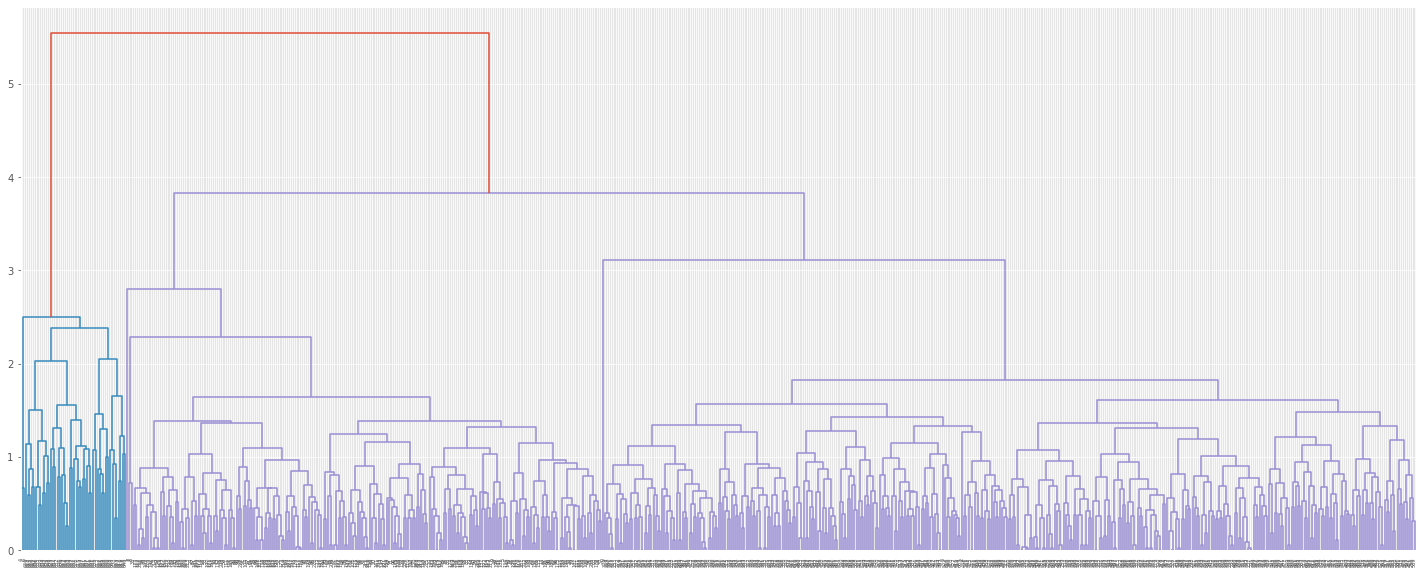

In [43]:
plt.figure(figsize=(25, 10))
dendrogram(Z_average)
plt.show()

>* Distances range from 0-5+

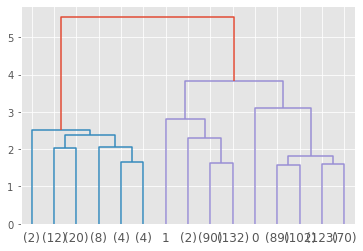

In [44]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z_average,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=15,  # show only the last p merged clusters
)
plt.show()

>* Simplified to show last 15 merged clusters. Distances range from 0-5+

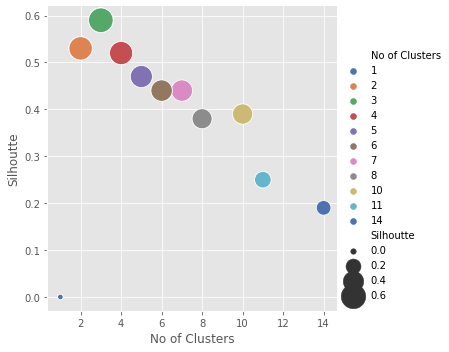

In [45]:
h_clus_average = []
for i in np.arange(0,int(round(coph_dists_average.max())),0.1):
    clusters_average = fcluster(Z_average, i, criterion='distance')
    if len(np.unique(clusters_average)) > 1:
        a = round(silhouette_score(Y_std,clusters_average),2)
    else:
        a = 0
#     print("Max distance",i,"Silhoutte Coeff", a, "No of Clusters", len(np.unique(clusters)))
    h_clus_average.append({"Max distance":i,"Silhoutte":a, "No of Clusters":len(np.unique(clusters_average))})
dfh_average = pd.DataFrame(h_clus_average).sort_values(by=['Silhoutte','Max distance'], ascending=[False,True])
sns.relplot(x='No of Clusters', y='Silhoutte', hue='No of Clusters', size='Silhoutte', sizes=(30, 600), palette='deep', 
                data=dfh_average[dfh_average['No of Clusters'] <= 15] )
plt.show()

>* For 3 clusters, Silhoutte is the highest ~0.6

In [46]:
dfh_average.head()

,Max distance,Silhoutte,No of Clusters
32,3.20,0.59,3
33,3.30,0.59,3
34,3.40,0.59,3
35,3.50,0.59,3
36,3.60,0.59,3


In [47]:
max_distance_average = dfh_average[dfh_average['Silhoutte'] == dfh_average['Silhoutte'].max()]['Max distance'].max()
max_h_clusters_average = dfh_average[dfh_average['Silhoutte'] == dfh_average['Silhoutte'].max()]['No of Clusters'].max()
print("\033[1mMax Distance(average) - \033[0m",max_distance_average, "\n\033[1mMax Clusters(average) - \033[0m", max_h_clusters_average)

Max Distance(average) -  3.8000000000000003 
Max Clusters(average) -  3


In [48]:
clusters_average = fcluster(Z_average, max_distance_average, criterion='distance')
Y_std['hgroup_average'] = clusters_average
Y_std.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,hgroup_ward,hgroup_average
0,1.74,-1.25,-0.86,-0.55,-1.25,3,3
1,0.41,-0.79,-1.47,2.52,1.89,1,2
2,0.41,1.06,-0.86,0.13,0.15,3,3
3,-0.12,0.14,-0.86,-0.55,0.15,3,3
4,1.74,0.60,-1.47,3.20,-0.20,2,1
5,-0.39,-0.79,-1.47,-0.55,1.54,1,2
6,1.74,0.14,-1.47,2.86,-0.55,2,1
7,-0.52,-0.79,-1.47,-0.55,-0.90,1,2
8,-0.79,-1.25,-1.47,-0.21,-0.55,1,2
9,-0.84,-0.33,-1.47,-0.55,1.19,1,2


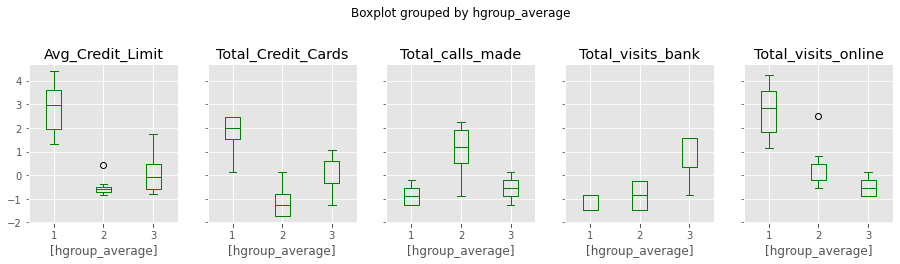

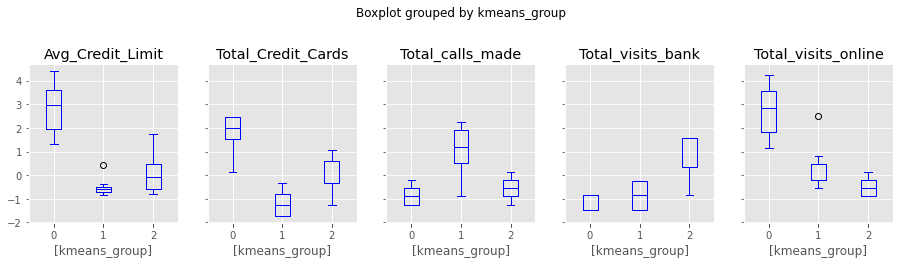

In [49]:
filtercol = Y_std.columns[Y_std.columns.str.startswith(('hgroup')) & ~Y_std.columns.str.endswith('average')]
Y_std[Y_std.columns[~Y_std.columns.isin(filtercol)]].boxplot(by=['hgroup_average'],  layout=(3,5), figsize=(15, 10), color='green')
X_std.boxplot(by = 'kmeans_group',  layout=(3,5), figsize=(15, 10), color='blue')
plt.show()

>* Based on boxplot visuals above, <font color=blue>Kmeans</font> groups can be mapped to <font color=green>Agglomerative clustering</font> groups.
>>* <font color=green>Group 1</font> maps to <font color=blue>Group 0</font>.
>>* <font color=green>Group 2</font> maps to <font color=blue>Group 1</font>.
>>* <font color=green>Group 3</font> maps to <font color=blue>Group 2</font>.
>* **It seems that box plots in <font color=green>Average linkage</font> are identical to <font color=blue>Kmeans.</font>**

### Single Linkage Method

In [50]:
Z_single = linkage(Y_std, method='single', metric='euclidean')
c_single, coph_dists_single = cophenet(Z_single , pdist(Y_std))
print("\033[1mLinkage Matrix(single) - \033[0m", Z_single.shape,
      "\n\033[1mCophenetic Coefficient -\033[0m", '{:,.2f}'.format(c_single), 
      "\n\033[1mCophenetic Distances - \033[0m", '{:,.2f}'.format(coph_dists_single.min()), 
      "-", '{:,.2f}'.format(coph_dists_single.max()))

Linkage Matrix(single) -  (659, 4) 
Cophenetic Coefficient - 0.91 
Cophenetic Distances -  0.00 - 2.81


>* For Single Linkage, Cophenetic Coefficient >0.9

In [51]:
Z_single[:]

array([[4.64000000e+02, 4.97000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.25000000e+02, 4.55000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.50000000e+02, 3.61000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.00000000e+00, 1.29000000e+03, 1.92949629e+00, 2.25000000e+02],
       [1.31500000e+03, 1.31600000e+03, 2.29866393e+00, 6.10000000e+02],
       [1.31400000e+03, 1.31700000e+03, 2.81298933e+00, 6.60000000e+02]])

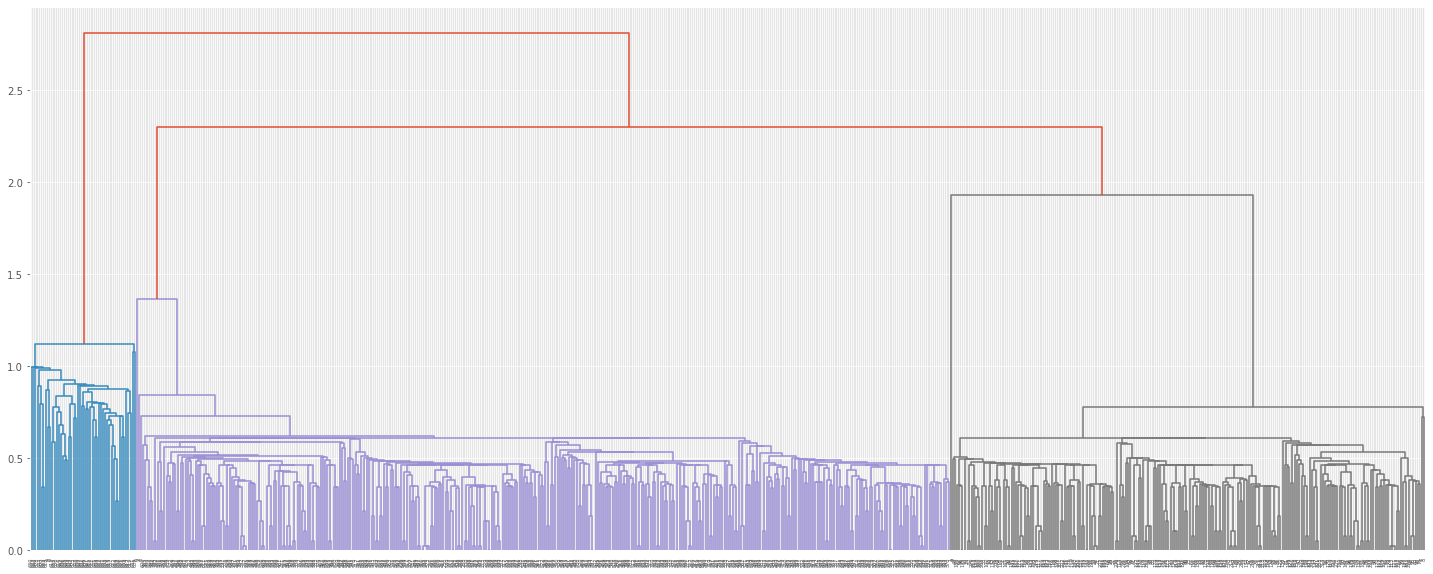

In [52]:
plt.figure(figsize=(25, 10))
dendrogram(Z_single)
plt.show()

>* Distances range from 0~2+

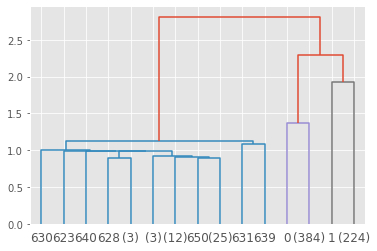

In [53]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z_single,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=15,  # show only the last p merged clusters
)
plt.show()

>* Simplified to show last 15 merged clusters. Distances range from 0~2+

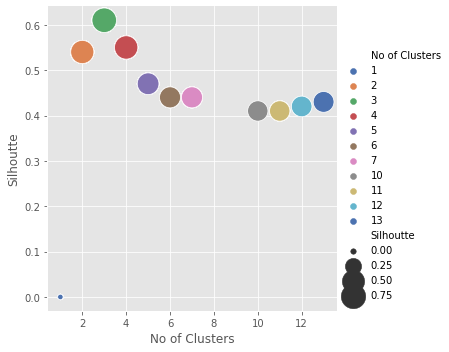

In [54]:
h_clus_single = []
for i in np.arange(0,int(round(coph_dists_single.max())),0.01):
    clusters_single = fcluster(Z_single, i, criterion='distance')
    if len(np.unique(clusters_single)) > 1:
        a = round(silhouette_score(Y_std,clusters_single),2)
    else:
        a = 0
#     print("Max distance",i,"Silhoutte Coeff", a, "No of Clusters", len(np.unique(clusters)))
    h_clus_single.append({"Max distance":i,"Silhoutte":a, "No of Clusters":len(np.unique(clusters_single))})
dfh_single = pd.DataFrame(h_clus_single).sort_values(by=['Silhoutte','Max distance'], ascending=[False,True])
sns.relplot(x='No of Clusters', y='Silhoutte', hue='No of Clusters', size='Silhoutte', sizes=(30, 600), palette='deep', 
                data=dfh_single[dfh_single['No of Clusters'] <= 15] )
plt.show()

>* For 3 clusters, Silhoutte is the highest >0.6

In [55]:
dfh_single.head()

,Max distance,Silhoutte,No of Clusters
193,1.93,0.61,3
194,1.94,0.61,3
195,1.95,0.61,3
196,1.96,0.61,3
197,1.97,0.61,3


In [56]:
max_distance_single = dfh_single[dfh_single['Silhoutte'] == dfh_single['Silhoutte'].max()]['Max distance'].max()
max_h_clusters_single = dfh_single[dfh_single['Silhoutte'] == dfh_single['Silhoutte'].max()]['No of Clusters'].max()
print("\033[1mMax Distance(single) - \033[0m",max_distance_single, "\n\033[1mMax Clusters(single) - \033[0m", max_h_clusters_single)

Max Distance(single) -  2.29 
Max Clusters(single) -  3


In [57]:
clusters_single = fcluster(Z_single, max_distance_single, criterion='distance')
Y_std['hgroup_single'] = clusters_single
Y_std.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,hgroup_ward,hgroup_average,hgroup_single
0,1.74,-1.25,-0.86,-0.55,-1.25,3,3,2
1,0.41,-0.79,-1.47,2.52,1.89,1,2,3
2,0.41,1.06,-0.86,0.13,0.15,3,3,2
3,-0.12,0.14,-0.86,-0.55,0.15,3,3,2
4,1.74,0.60,-1.47,3.20,-0.20,2,1,1
5,-0.39,-0.79,-1.47,-0.55,1.54,1,2,3
6,1.74,0.14,-1.47,2.86,-0.55,2,1,1
7,-0.52,-0.79,-1.47,-0.55,-0.90,1,2,3
8,-0.79,-1.25,-1.47,-0.21,-0.55,1,2,3
9,-0.84,-0.33,-1.47,-0.55,1.19,1,2,3


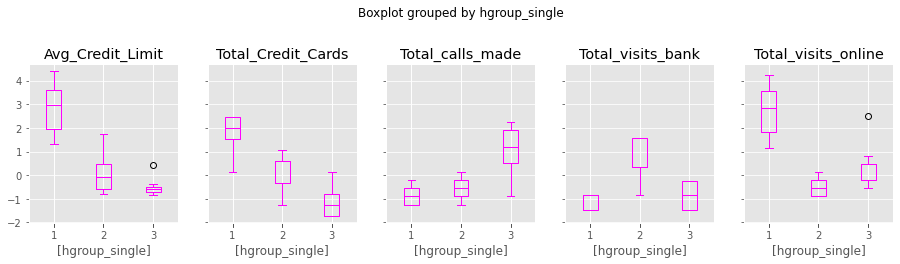

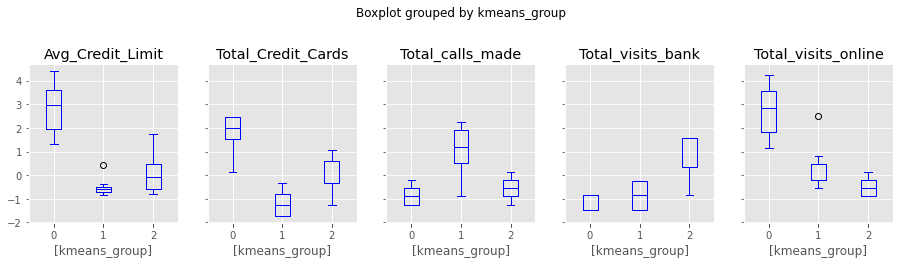

In [58]:
filtercol = Y_std.columns[Y_std.columns.str.startswith(('hgroup')) & ~Y_std.columns.str.endswith('single')]
Y_std[Y_std.columns[~Y_std.columns.isin(filtercol)]].boxplot(by=['hgroup_single'],  layout=(3,5), figsize=(15, 10), color='magenta')
X_std.boxplot(by = 'kmeans_group',  layout=(3,5), figsize=(15, 10), color='blue')
plt.show()

>* Based on boxplot visuals above, <font color=blue>Kmeans</font> groups can be mapped to <font color=magenta>Agglomerative clustering</font> groups.
>>* <font color=magenta>Group 1</font> maps to <font color=blue>Group 0</font>.
>>* <font color=magenta>Group 2</font> maps to <font color=blue>Group 2</font>.
>>* <font color=magenta>Group 3</font> maps to <font color=blue>Group 1</font>.
>* **It seems that box plots in <font color=magenta>Single linkage</font> are identical to <font color=blue>Kmeans.</font>**

### Complete Linkage Model

In [59]:
Z_complete = linkage(Y_std, method='complete', metric='euclidean')
c_complete, coph_dists_complete = cophenet(Z_complete , pdist(Y_std))
print("\033[1mLinkage Matrix(complete) - \033[0m", Z_complete.shape,
      "\n\033[1mCophenetic Coefficient -\033[0m", '{:,.2f}'.format(c_complete), 
      "\n\033[1mCophenetic Distances - \033[0m", '{:,.2f}'.format(coph_dists_complete.min()), 
      "-", '{:,.2f}'.format(coph_dists_complete.max()))

Linkage Matrix(complete) -  (659, 4) 
Cophenetic Coefficient - 0.93 
Cophenetic Distances -  0.00 - 8.80


>* For Complete Linkage, Cophenetic Coefficient >0.9

In [60]:
Z_complete[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       [ 320.        ,  378.        ,    0.        ,    2.        ],
       ...,
       [   0.        , 1313.        ,    4.30668119,  385.        ],
       [1315.        , 1316.        ,    6.44230833,  610.        ],
       [1314.        , 1317.        ,    8.79646323,  660.        ]])

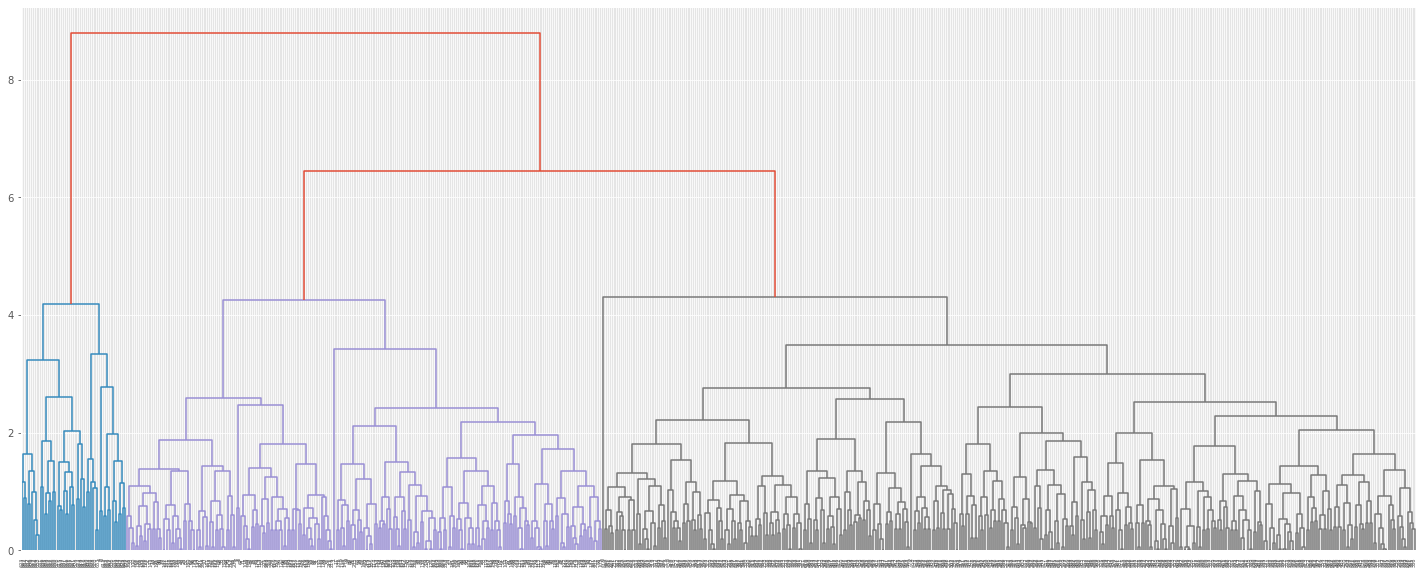

In [61]:
plt.figure(figsize=(25, 10))
dendrogram(Z_complete)
plt.show()

>* Distances range from 0~9

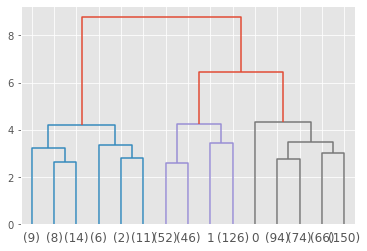

In [62]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z_complete,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=15,  # show only the last p merged clusters
)
plt.show()

>* Simplified to show last 15 merged clusters. Distances range from 0~9

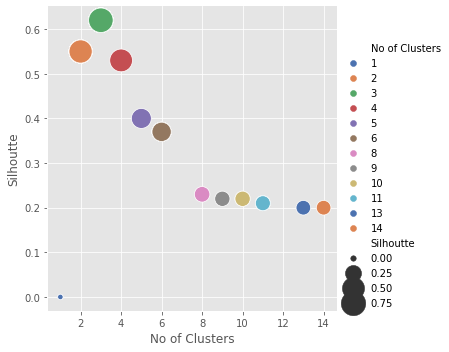

In [63]:
h_clus_complete = []
for i in np.arange(0,int(round(coph_dists_complete.max())),0.1):
    clusters_complete = fcluster(Z_complete, i, criterion='distance')
    if len(np.unique(clusters_complete)) > 1:
        a = round(silhouette_score(Y_std,clusters_complete),2)
    else:
        a = 0
#     print("Max distance",i,"Silhoutte Coeff", a, "No of Clusters", len(np.unique(clusters)))
    h_clus_complete.append({"Max distance":i,"Silhoutte":a, "No of Clusters":len(np.unique(clusters_complete))})
dfh_complete = pd.DataFrame(h_clus_complete).sort_values(by=['Silhoutte','Max distance'], ascending=[False,True])
sns.relplot(x='No of Clusters', y='Silhoutte', hue='No of Clusters', size='Silhoutte', sizes=(30, 600), palette='deep', 
                data=dfh_complete[dfh_complete['No of Clusters'] <= 15] )
plt.show()

>* For 3 clusters, Silhoutte is the highest >0.6

In [64]:
dfh_complete.head()

,Max distance,Silhoutte,No of Clusters
44,4.40,0.62,3
45,4.50,0.62,3
46,4.60,0.62,3
47,4.70,0.62,3
48,4.80,0.62,3


In [65]:
max_distance_complete = dfh_complete[dfh_complete['Silhoutte'] == dfh_complete['Silhoutte'].max()]['Max distance'].max()
max_h_clusters_complete = dfh_complete[dfh_complete['Silhoutte'] == dfh_complete['Silhoutte'].max()]['No of Clusters'].max()
print("\033[1mMax Distance(complete) - \033[0m",max_distance_complete, 
      "\n\033[1mMax Clusters(complete) - \033[0m", max_h_clusters_complete)

Max Distance(complete) -  6.4 
Max Clusters(complete) -  3


In [66]:
clusters_complete = fcluster(Z_complete, max_distance_complete, criterion='distance')
Y_std['hgroup_complete'] = clusters_complete
Y_std.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,hgroup_ward,hgroup_average,hgroup_single,hgroup_complete
0,1.74,-1.25,-0.86,-0.55,-1.25,3,3,2,3
1,0.41,-0.79,-1.47,2.52,1.89,1,2,3,2
2,0.41,1.06,-0.86,0.13,0.15,3,3,2,3
3,-0.12,0.14,-0.86,-0.55,0.15,3,3,2,3
4,1.74,0.60,-1.47,3.20,-0.20,2,1,1,1
5,-0.39,-0.79,-1.47,-0.55,1.54,1,2,3,2
6,1.74,0.14,-1.47,2.86,-0.55,2,1,1,1
7,-0.52,-0.79,-1.47,-0.55,-0.90,1,2,3,2
8,-0.79,-1.25,-1.47,-0.21,-0.55,1,2,3,2
9,-0.84,-0.33,-1.47,-0.55,1.19,1,2,3,2


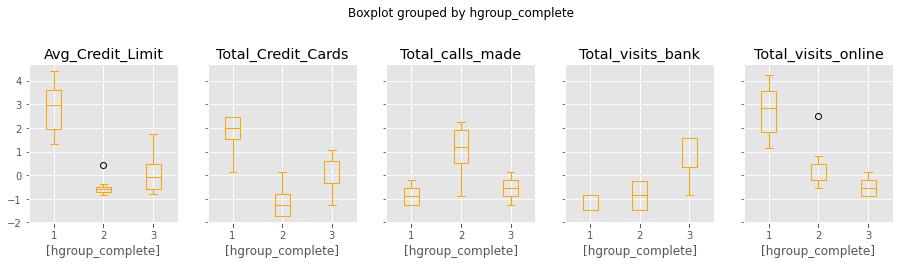

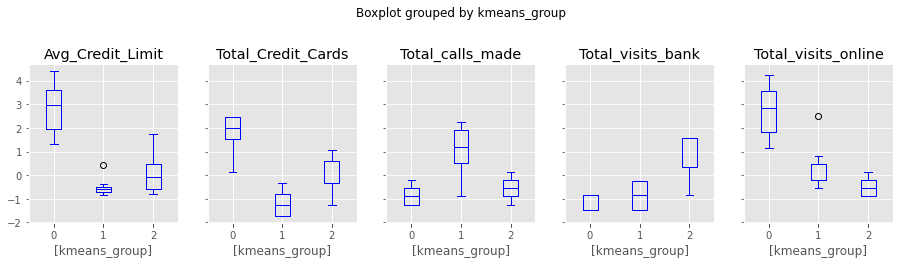

In [67]:
filtercol = Y_std.columns[Y_std.columns.str.startswith(('hgroup')) & ~Y_std.columns.str.endswith('complete')]
Y_std[Y_std.columns[~Y_std.columns.isin(filtercol)]].boxplot(by=['hgroup_complete'],  layout=(3,5), figsize=(15, 10), color='orange')
X_std.boxplot(by = 'kmeans_group',  layout=(3,5), figsize=(15, 10), color='blue')
plt.show()

>* Based on boxplot visuals above, <font color=blue>Kmeans</font> groups can be mapped to <font color=orange>Agglomerative clustering</font> groups.
>>* <font color=orange>Group 1</font> maps to <font color=blue>Group 0</font>.
>>* <font color=orange>Group 2</font> maps to <font color=blue>Group 1</font>.
>>* <font color=orange>Group 3</font> maps to <font color=blue>Group 2</font>.
>* **It seems that box plots in <font color=orange>Complete linkage</font> are identical to <font color=blue>Kmeans.</font>**

### Centroid Linkage Model

In [68]:
#Generate Linkage matrix
Z_centroid = linkage(Y_std, method='centroid', metric='euclidean')
c_centroid, coph_dists_centroid = cophenet(Z_centroid , pdist(Y_std))
print("\033[1mLinkage Matrix(centroid) - \033[0m", Z_centroid.shape,
      "\n\033[1mCophenetic Coefficient -\033[0m", '{:,.2f}'.format(c_centroid), 
      "\n\033[1mCophenetic Distances - \033[0m", '{:,.2f}'.format(coph_dists_centroid.min()), 
      "-", '{:,.2f}'.format(coph_dists_centroid.max()))

Linkage Matrix(centroid) -  (659, 4) 
Cophenetic Coefficient - 0.95 
Cophenetic Distances -  0.00 - 5.69


>* For Centroid Linkage, Cophenetic Coefficient is > 0.9

In [69]:
Z_centroid[:]

array([[ 257.        ,  295.        ,    0.        ,    2.        ],
       [  17.        ,  162.        ,    0.        ,    2.        ],
       [ 310.        ,  395.        ,    0.        ,    2.        ],
       ...,
       [   0.        , 1312.        ,    2.93256398,  385.        ],
       [1315.        , 1316.        ,    3.93466504,  610.        ],
       [1313.        , 1317.        ,    5.69166386,  660.        ]])

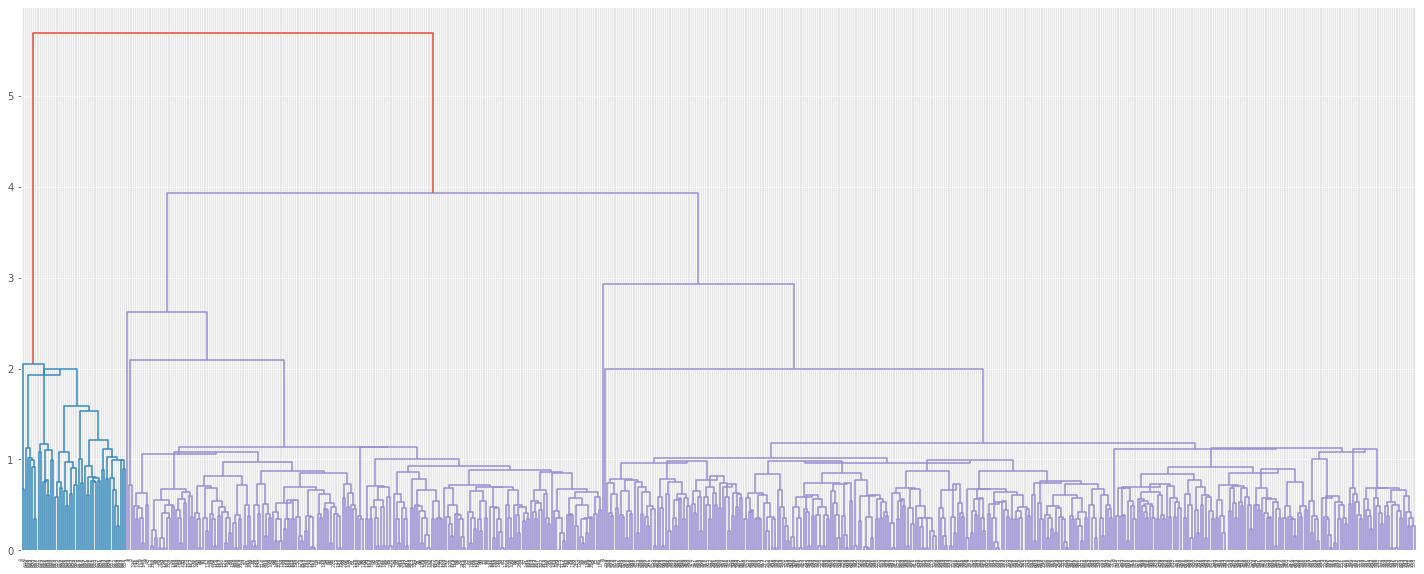

In [70]:
plt.figure(figsize=(25, 10))
dendrogram(Z_centroid)
plt.show()

>* Distances range from 0-5+

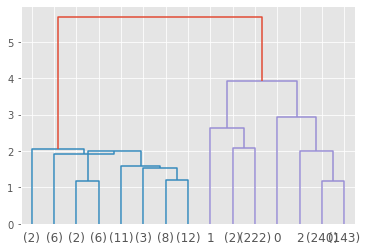

In [71]:
#Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z_centroid,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=15,  # show only the last p merged clusters
)
plt.show()

>* Simplified to show last 15 merged clusters. Distances range from 0-5+

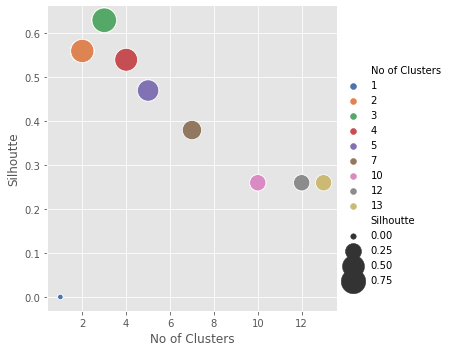

In [72]:
h_clus_centroid = []
for i in np.arange(0,int(round(coph_dists_centroid.max())),0.1):
    clusters_centroid = fcluster(Z_centroid, i, criterion='distance')
    if len(np.unique(clusters_centroid)) > 1:
        a = round(silhouette_score(Y_std,clusters_centroid),2)
    else:
        a = 0
    h_clus_centroid.append({"Max distance":i,"Silhoutte":a, "No of Clusters":len(np.unique(clusters_centroid))})
dfh_centroid = pd.DataFrame(h_clus_centroid).sort_values(by=['Silhoutte','Max distance'], ascending=[False,True])
sns.relplot(x='No of Clusters', y='Silhoutte', hue='No of Clusters', size='Silhoutte', sizes=(30, 600), palette='deep', 
                data=dfh_centroid[dfh_centroid['No of Clusters'] <= 15] )
plt.show()

>* For 3 clusters, Silhoutte is the highest >0.6

In [73]:
dfh_centroid.head()

,Max distance,Silhoutte,No of Clusters
30,3.00,0.63,3
31,3.10,0.63,3
32,3.20,0.63,3
33,3.30,0.63,3
34,3.40,0.63,3


In [74]:
max_distance_centroid = dfh_centroid[dfh_centroid['Silhoutte'] == dfh_centroid['Silhoutte'].max()]['Max distance'].max()
max_h_clusters_centroid = dfh_centroid[dfh_centroid['Silhoutte'] == dfh_centroid['Silhoutte'].max()]['No of Clusters'].max()
print("\033[1mMax Distance(centroid) - \033[0m",'{:,.2f}'.format(max_distance_centroid), 
      "\n\033[1mMax Clusters(centroid) - \033[0m", max_h_clusters_centroid)

Max Distance(centroid) -  3.90 
Max Clusters(centroid) -  3


In [75]:
clusters_centroid = fcluster(Z_centroid, max_distance_centroid, criterion='distance')
Y_std['hgroup_centroid'] = clusters_centroid
Y_std.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,hgroup_ward,hgroup_average,hgroup_single,hgroup_complete,hgroup_centroid
0,1.74,-1.25,-0.86,-0.55,-1.25,3,3,2,3,3
1,0.41,-0.79,-1.47,2.52,1.89,1,2,3,2,2
2,0.41,1.06,-0.86,0.13,0.15,3,3,2,3,3
3,-0.12,0.14,-0.86,-0.55,0.15,3,3,2,3,3
4,1.74,0.60,-1.47,3.20,-0.20,2,1,1,1,1
5,-0.39,-0.79,-1.47,-0.55,1.54,1,2,3,2,2
6,1.74,0.14,-1.47,2.86,-0.55,2,1,1,1,1
7,-0.52,-0.79,-1.47,-0.55,-0.90,1,2,3,2,2
8,-0.79,-1.25,-1.47,-0.21,-0.55,1,2,3,2,2
9,-0.84,-0.33,-1.47,-0.55,1.19,1,2,3,2,2


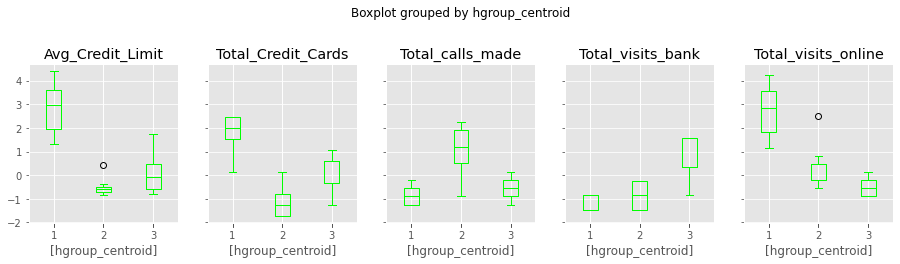

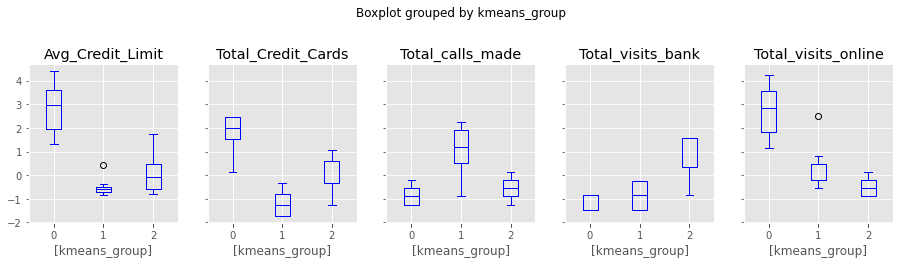

In [76]:
#get columns relevant for centroid
filtercol = Y_std.columns[Y_std.columns.str.startswith(('hgroup')) & ~Y_std.columns.str.endswith('centroid')]
Y_std[Y_std.columns[~Y_std.columns.isin(filtercol)]].boxplot(by=['hgroup_centroid'],  layout=(3,5), figsize=(15, 10), color='lime')
X_std.boxplot(by = 'kmeans_group',  layout=(3,5), figsize=(15, 10), color='blue')
plt.show()

>* Based on boxplot visuals above, <font color=blue>Kmeans</font> groups can be mapped to <font color=lime>Agglomerative clustering</font> groups.
>>* <font color=lime>Group 1</font> maps to <font color=blue>Group 0</font>.
>>* <font color=lime>Group 2</font> maps to <font color=blue>Group 1</font>.
>>* <font color=lime>Group 3</font> maps to <font color=blue>Group 2</font>.
>* **It seems that box plots in <font color=lime>Centroid linkage</font> are identical to <font color=blue>Kmeans.</font>**

### Compare Clusters

#### Compare Attributes

>* Chosen Attributes are Cophenetic Coefficient, Silhoutte Coefficient, Distance(Min), Distance(Max), No. of Clusters

In [77]:
data={'Method' : ['K-means','Ward','Average','Single','Complete','Centroid'],
      'Cophenetic': [np.nan,c_ward,c_average,c_single,c_complete, c_centroid],
      'Silhoutte' : [kmeans_df['Silhoutte'].max(), dfh_ward['Silhoutte'].max(),dfh_average['Silhoutte'].max(),dfh_single['Silhoutte'].max(),
                        dfh_complete['Silhoutte'].max(),dfh_centroid['Silhoutte'].max()],
      'Distance(Min)': [centroids.min(), coph_dists_ward.min(),coph_dists_average.min(),coph_dists_single.min(),coph_dists_complete.min(),
                      coph_dists_centroid.min()],
      'Distance(Max)': [centroids.max(), coph_dists_ward.max(),coph_dists_average.max(),coph_dists_single.max(),coph_dists_complete.max(),
                      coph_dists_centroid.max()],
      'Clusters' : [max_clusters_kmeans,max_h_clusters_ward,max_h_clusters_average,max_h_clusters_single,max_h_clusters_complete,
                    max_h_clusters_centroid]}
comp_df = pd.DataFrame(data)
comp_df

,Method,Cophenetic,Silhoutte,Distance(Min),Distance(Max),Clusters
0,K-means,nan,0.52,-1.11,2.83,3
1,Ward,0.74,0.51,0.00,50.16,3
2,Average,0.92,0.59,0.00,5.55,3
3,Single,0.91,0.61,0.00,2.81,3
4,Complete,0.93,0.62,0.00,8.80,3
5,Centroid,0.95,0.63,0.00,5.69,3


>* **Infer that Hierarchical clustering seems in many cases seems to be performing better just based on Silhoutte coefficient. Centroid based linkage has the highest Silhoutte** 
>* **Number of clusters can vary based on highest value of Silhoutte chosen**

#### Compare Boxplots

In [78]:
Y_std.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'hgroup_ward',
       'hgroup_average', 'hgroup_single', 'hgroup_complete',
       'hgroup_centroid'],
      dtype='object')

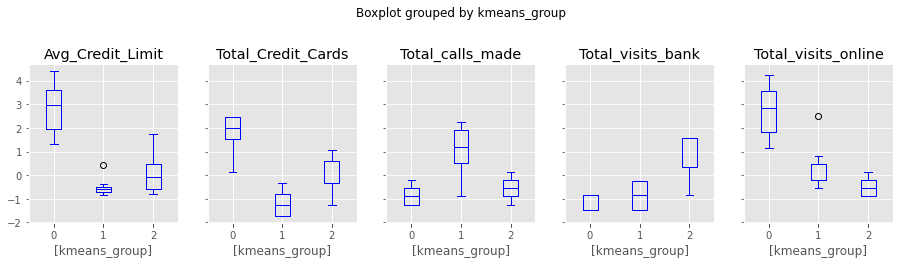

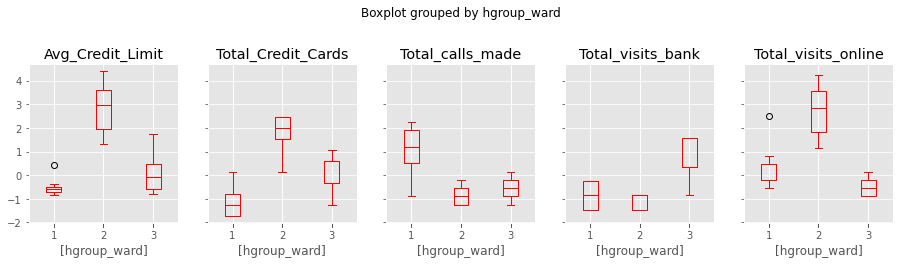

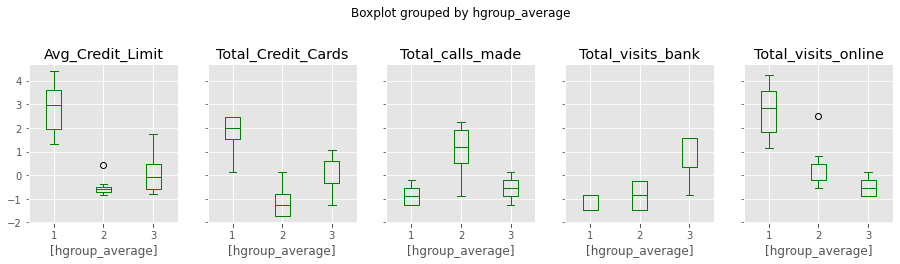

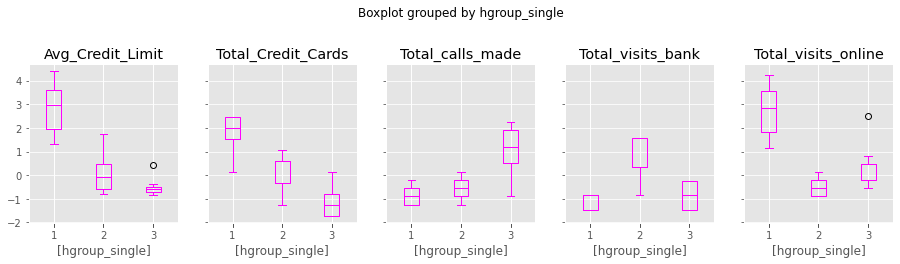

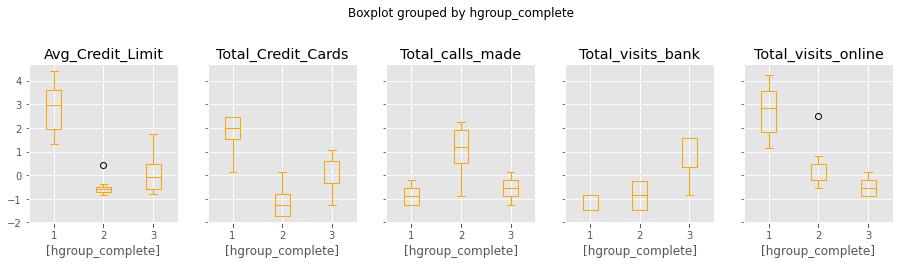

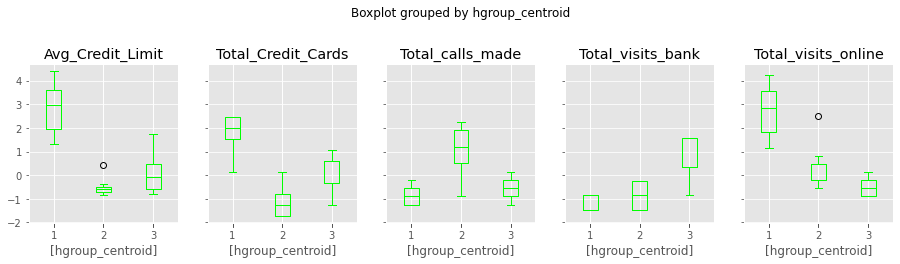

In [79]:
X_std.boxplot(by = 'kmeans_group',  layout=(3,5), figsize=(15, 10), color='blue')
filtercol = Y_std.columns[Y_std.columns.str.startswith(('hgroup')) & ~Y_std.columns.str.endswith('ward')]
Y_std[Y_std.columns[~Y_std.columns.isin(filtercol)]].boxplot(by=['hgroup_ward'],  layout=(3,5), figsize=(15, 10), color='red')
filtercol = Y_std.columns[Y_std.columns.str.startswith(('hgroup')) & ~Y_std.columns.str.endswith('average')]
Y_std[Y_std.columns[~Y_std.columns.isin(filtercol)]].boxplot(by=['hgroup_average'],  layout=(3,5), figsize=(15, 10), color='green')
filtercol = Y_std.columns[Y_std.columns.str.startswith(('hgroup')) & ~Y_std.columns.str.endswith('single')]
Y_std[Y_std.columns[~Y_std.columns.isin(filtercol)]].boxplot(by=['hgroup_single'],  layout=(3,5), figsize=(15, 10), color='magenta')
filtercol = Y_std.columns[Y_std.columns.str.startswith(('hgroup')) & ~Y_std.columns.str.endswith('complete')]
Y_std[Y_std.columns[~Y_std.columns.isin(filtercol)]].boxplot(by=['hgroup_complete'],  layout=(3,5), figsize=(15, 10), color='orange')
filtercol = Y_std.columns[Y_std.columns.str.startswith(('hgroup')) & ~Y_std.columns.str.endswith('centroid')]
Y_std[Y_std.columns[~Y_std.columns.isin(filtercol)]].boxplot(by=['hgroup_centroid'],  layout=(3,5), figsize=(15, 10), color='lime')
plt.show()

### Cluster Analysis

The silhoutte coefficient was highest for 3 clusters so 3 clusters were creating with following observations:
1. <font color=blue>1st Cluster</font> - The number of customers in this group is the lowest(50). They have higher average credit limit and  credit cards, and does most of communication and servicing by going online. They rarely call or visit bank. There is a large variation in higher credit limits and number of visits online, but average numbers are high. 
2. <font color=blue>2nd Cluster</font> - A high number of customers (224) belong to this group. These customers have the lowest average credit limit and credit cards. They do go online for communication and self-service, but they make the most number of total calls to the call center and are lower in bracket of visiting bank. There is a high variation in total calls made. 
3. <font color=blue>3rd Cluster</font> - Highest number of customers(386) belong to this group. These customers have an average/average credit limit and credit cards. The do call and go online sometimes, but most of the time prefer to visit the bank and account for most number of visits to the bank. There is a high variation is total visits to the bank.

### Key Questions

#### 1.How many different segments of customers are there?
>* There are 3 different customer segments. One are **High-Credit Online shoppers(1st Cluster), Low-Credit Callers(2nd Cluster), and Medium-Credit Face2Face(3rd Cluster)**
#### 2.How are these segments different from each other?
>* **High-Credit Online cluster** consists of low number of customer with higher credit limits and they own a higher number of credit cards. They mostly shop and serve online. 
>* **Low-Credit Callers cluster** consistes of a high number of customers with low credit limits and they own least number of credit cards. They mostly shop and serve via call center. 
>* **Medium-Credit Face2Face cluster** consists of highest number of customers with average credit limits and average ownership of number of credit cards. These customers visit the bank and prefer face2face communication and service. 
#### 3.What are your recommendations to the bank on how to better market to and service these customers?
>* **Market**
>>* For **High-Credit Online cluster**, propose offers online and run online marketing campaigns. These are also the customers who are most likely to shop for new products more. Higher value offers can be proposed to these customers. Along with that these are good candidates for up-sell and cross-sell. 
>>* For **Low-Credit Callers cluster**, prepaid offers can be proposed to these customers via the call center. They are more likely to buy something if there is no hefty price tag and no long term contract. 
>>* For **Medium-Credit Face2Face cluster**, value based offers can be proposed when they visit a branch. However, visiting branch in itself has a cost associated to it. Awareness campaigns with small credit can be run for these customers. For e.g. if they enroll into e-bill, they will get 5 currency credits. These are the customers who may buy if the sales rep is able to convince them if it is a good offer. 
>* **Service**
>>* For **High-Credit Online cluster**, these are the customers who can be reached out for e-bills and autopay. These customers can be kept informed of events via email/SMS communications. Buying options through google home/alexa can be proposed to these customers. 
>>* For **Low-Credit Callers cluster**, payment assistance programs can be provided to these customers so they have an option to pay via small amounts monthly and still keep the product or service. 
>>* For **Medium-Credit Face2Face cluster**, they are generally conservative spenders, so tricks on saving money or discount coupons can be sent to these customers via mail/email. They should be made aware of the ways they can get help either online or through the call center and how they can save time and cost of coming to the bank location by using these services online. 